In [2]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly as py
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from lightgbm import LGBMClassifier


In [4]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## Analasis of Distribution of every feature in this dataset

In [9]:
def hist_maker(feature, name):
  enable_plotly_in_cell()
  fig = go.Figure()
  fig.add_trace(
      go.Histogram(
          x = feature,
          marker_color = 'rgb(252,232,0)'
      )
  )
  #fig = px.histogram(data,x=feature, title=f'Distribtion of {feature}')
  fig.update_layout(
    title = f'Distribtion of {name}',
    title_x=0.5,
    xaxis=dict(
        linecolor='rgb(34,56,78)',
        showline=True,
        showgrid=False,
        showticklabels=True,
        ticks='outside',
        tickfont=dict(
            family='arial',
            size=15,
            color='Black'
        )
    ),
    yaxis = dict(
        title = 'Count',
        linecolor='rgb(34,56,78)',
        showline=True,
        showgrid=True,
        gridwidth = 3,
        showticklabels=True,
        ticks='outside',
        tickfont=dict(
            family='arial',
            size=15,
            color='Black'
        )
    ),
    plot_bgcolor = 'rgb(243,243,243)',
    paper_bgcolor = 'rgb(243,243,243)'
    
  )

  fig.show()

In [10]:
 features = data.columns.to_list()
 for feature in features:
   hist_maker(data[feature], feature)

Output hidden; open in https://colab.research.google.com to view.

**Data Cleaning**

In [18]:
def cleaner(target,feature):
  data.loc[((data.target == target) & (data[feature] == 0)), feature] = data.loc[(data.target == target),feature].median()

In [19]:
lst = ['oldpeak','ca']
for target in range(2):
  for feature in lst:
    cleaner(target, feature)

In [22]:
def box_plot(series1, series2, name):
    enable_plotly_in_cell()
    fig=go.Figure()
    fig.add_trace(

        go.Box(
            y= series1,
            boxmean='sd',boxpoints='all',
            fillcolor='rgb(232,232,0)',
            name = name+'0',
            marker=dict(
                size=5,
                color='rgb(35,31,32)'
            ),
            line=dict(width=1)


        )

    )
    fig.add_trace(

        go.Box(
            y= series2,
            boxmean='sd',boxpoints='all',
            fillcolor='rgb(232,232,0)',
            name = name+'1',
            marker=dict(
                size=5,
                color='rgb(35,31,32)'
            ),
            line=dict(width=1)


        )

    )
    fig.update_layout(
        title = name,
        yaxis=dict(
            gridwidth=3,
            tickfont=dict(
                family='arial',
                size=15,
                color='Black'
            ),
        ),

        paper_bgcolor='rgb(243,243,243)',
        plot_bgcolor='rgb(243,243,243)'

    )
    fig.show()

In [23]:
lst = ['oldpeak','ca']
for el in lst:
  box_plot(data.loc[data.target == 0, el],data.loc[data.target == 1, el], el)

Output hidden; open in https://colab.research.google.com to view.

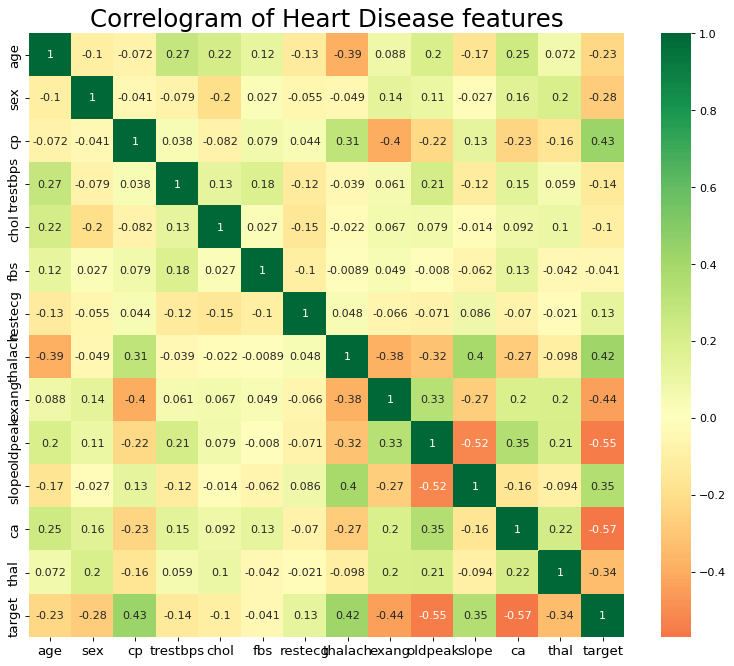

In [21]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlogram of Heart Disease features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Modeling

In [24]:
X = data.drop(columns='target')
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train size: (820, 13), X_test size: (205, 13)


#Dimensionality Reduction method for visulaization

In [26]:
pca=PCA(n_components=2)
trans=pca.fit_transform(X_train)
enable_plotly_in_cell()
px.scatter(trans,x=trans[:,0],y=trans[:,1],color=y_train)

Output hidden; open in https://colab.research.google.com to view.

In [28]:
tsne=TSNE(n_components=2,learning_rate='auto')
trans=tsne.fit_transform(X_train)
enable_plotly_in_cell()
px.scatter(trans,x=trans[:,0],y=trans[:,1],color=y_train)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },
        'GradientBoostingClassifier':{
            'model': GradientBoostingClassifier(random_state=1),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'n_estimators': [50,100,150,200]
            }
        },
        'LightGBC':{
            'model': LGBMClassifier(random_state=1),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'max_depth':[5,10,15,20]
            }            
        },
        'XGBoost':{
            'model': xgb.XGBClassifier(),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'max_depth':[5,10,15,20],
                'n_estimators':[50,100,150]
            }        
        },
        'AdaBoost':{
            'model': AdaBoostClassifier(),
            'parameters': {
                'learning_rate': [0.01,0.1,0.5,1,10,100],
                'n_estimators':[50,100,150],
                'algorithm':['SAMME', 'SAMME.R']
            }    
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.885366
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",1.000000
2,random_forest,{'n_estimators': 15},1.000000
3,svm,"{'C': 10, 'kernel': 'rbf'}",0.991463
4,GradientBoostingClassifier,"{'learning_rate': 0.1, 'n_estimators': 150}",0.997561
5,LightGBC,"{'learning_rate': 0.1, 'max_depth': 5}",1.000000
6,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",1.000000
7,AdaBoost,"{'algorithm': 'SAMME.R', 'learning_rate': 1, '...",0.996341


In [13]:
vot=[
    ('XGBOOST',xgb.XGBClassifier(learning_rate=1, max_depth=10, n_estimators=50)),
    ('LightGBC',LGBMClassifier(random_state=1, learning_rate=1, max_depth=15)),
    ('random forest', RandomForestClassifier(criterion='gini',n_estimators=15)),
    ('adaboost',AdaBoostClassifier(learning_rate=1,algorithm='SAMME.R',n_estimators=100))
]

In [14]:
voter=VotingClassifier(estimators=vot)
voter.fit(X_train,y_train)
print("Training accuracy : ",accuracy_score(y_train, voter.predict(X_train)))
print("Testing accuracy : ",accuracy_score(y_test, voter.predict(X_test)))


Training accuracy :  1.0
Testing accuracy :  1.0


In [15]:
voter_cv=cross_validate(voter,X,y,cv=5,return_train_score=True)
print("Training accuracy : ", voter_cv['train_score'].mean())
print("Testing accuracy : ", voter_cv['test_score'].mean())

Training accuracy :  0.9997560975609756
Testing accuracy :  0.9951219512195122


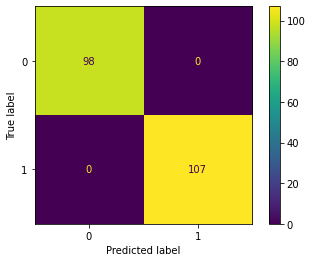

In [16]:
plot_confusion_matrix(voter, X_test, y_test) 

In [17]:
print(classification_report(y_test, voter.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [29]:
food_data = pd.read_csv('/content/drive/MyDrive/food.csv')

In [30]:
food_data.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Manganese,Data.Niacin,Data.Pantothenic Acid,Data.Protein,Data.Refuse Percentage,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Household Weights.1st Household Weight,Data.Household Weights.1st Household Weight Description,Data.Household Weights.2nd Household Weight,Data.Household Weights.2nd Household Weight Description,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,0.0,717,0,0,0.000,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,21.021,3.043,51.368,81.11,227.00,1 cup,14,1 tbsp,24,0.000,0.02,2,24,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,0.0,717,0,0,0.004,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,23.426,3.012,50.489,81.11,151.00,1 cup,9,1 tbsp,24,0.016,0.16,2,23,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,0.0,876,0,0,0.000,0.003,0.010,0.28,0,824,0.005,0.0,0.00,0.001,0.24,28.732,3.694,61.924,99.48,205.00,1 cup,13,1 tbsp,4,0.001,0.00,0,3,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,0.0,353,0,0,0.009,1.016,1.729,21.40,0,192,0.382,14.5,0.50,0.029,42.41,7.778,0.800,18.669,28.74,28.35,1 oz,17,1 cubic inch,528,0.040,0.31,23,387,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,0.0,371,0,0,0.012,0.118,0.288,23.24,0,286,0.351,14.5,0.51,0.014,41.11,8.598,0.784,18.764,29.68,132.00,"1 cup, diced",113,"1 cup, shredded",674,0.024,0.43,24,451,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [31]:
food_data.columns

Index(['Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Kilocalories',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Manganese',
       'Data.Niacin', 'Data.Pantothenic Acid', 'Data.Protein',
       'Data.Refuse Percentage', 'Data.Retinol', 'Data.Riboflavin',
       'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Household Weights.1st Household Weight',
       'Data.Household Weights.1st Household Weight Description',
       'Data.Household Weights.2nd Household Weight',
       'Data.Household Weights.2nd Household Weight Description',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iro

In [33]:
food_heart_data = food_data.loc[:,['Category','Description','Data.Fat.Saturated Fat']]

In [34]:
food_heart_data = food_heart_data.rename(columns={'Data.Fat.Saturated Fat':'Saturated_Fat'})

In [37]:
heart_rec=food_heart_data.loc[food_heart_data.groupby(by='Category').Saturated_Fat.idxmin()]\
.sort_values(by= ['Saturated_Fat'],ascending=[True])
heart_rec.head(25)

,Category,Description,Saturated_Fat
166,YOGURT,"YOGURT,CHOC,NONFAT MILK",0.0
1296,COMPANY,"COMPANY,CAMPBELL'S RED & WHITE,CURLY NOODLE SO...",0.0
4293,COFFEE SUB,"COFFEE SUB,RSTD GRAIN BEV,NAT TOUCH KAFFREE RO...",0.0
7156,PRAIRIE TURNIPS,"PRAIRIE TURNIPS,RAW (NORTHERN PLAINS INDIANS)",0.0
6076,ICE CREAMS,"ICE CREAMS,VANILLA,FAT FREE",0.0
5853,COCOA,"COCOA,DRY PDR,UNSWTND,HERSHEY'S EUROPEAN STYLE...",0.0
7038,COCKLES,"COCKLES,RAW (ALASKA NATIVE)",0.0
5871,PUDDINGS,"PUDDINGS,RICE,DRY MIX",0.0
7037,CLOUDBERRIES,"CLOUDBERRIES,RAW (ALASKA NATIVE)",0.0
2492,CLEMENTINES,"CLEMENTINES,RAW",0.0
